In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set()

In [11]:
import docker
import psycopg2
connection_config = {
    'host': 'localhost',
    'port': '5432',
    'database': 'train3',
    'user': 'postgres',
    'password': 'Password'
}
connection = psycopg2.connect(**connection_config)

In [15]:
df1 = pd.read_sql('select coalesce(yearofregistration, \'0000\') as yearofregistration, count(*) from cars group by yearofregistration order by yearofregistration', connection)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
yearofregistration    156 non-null object
count                 156 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


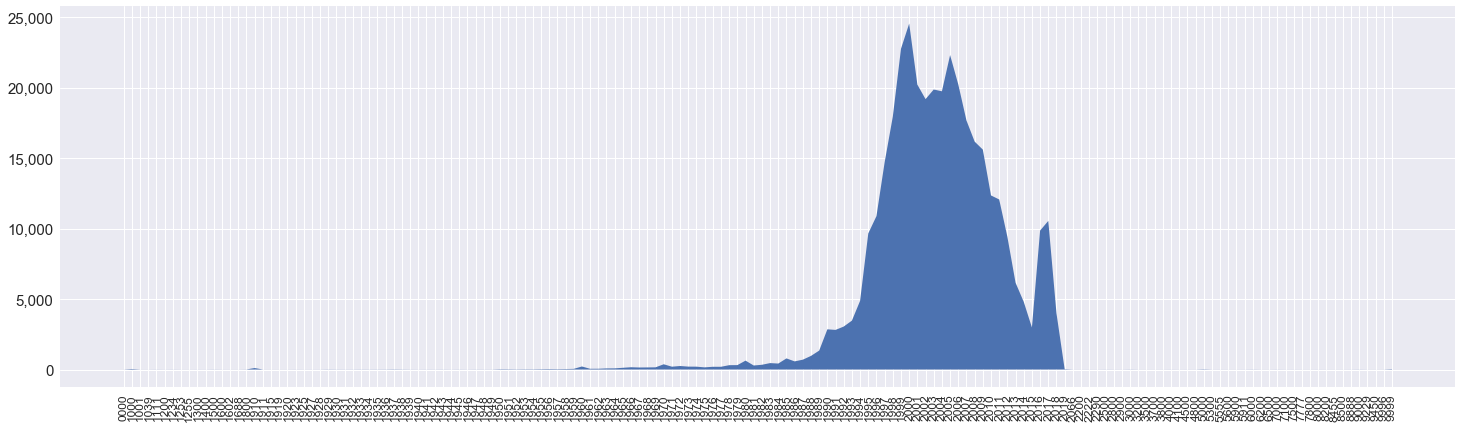

In [30]:
fig = plt.figure(figsize=(25, 7))
ax = fig.add_subplot(111)

ax.fill_between(df1['yearofregistration'], df1['count'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=15)

plt.show()

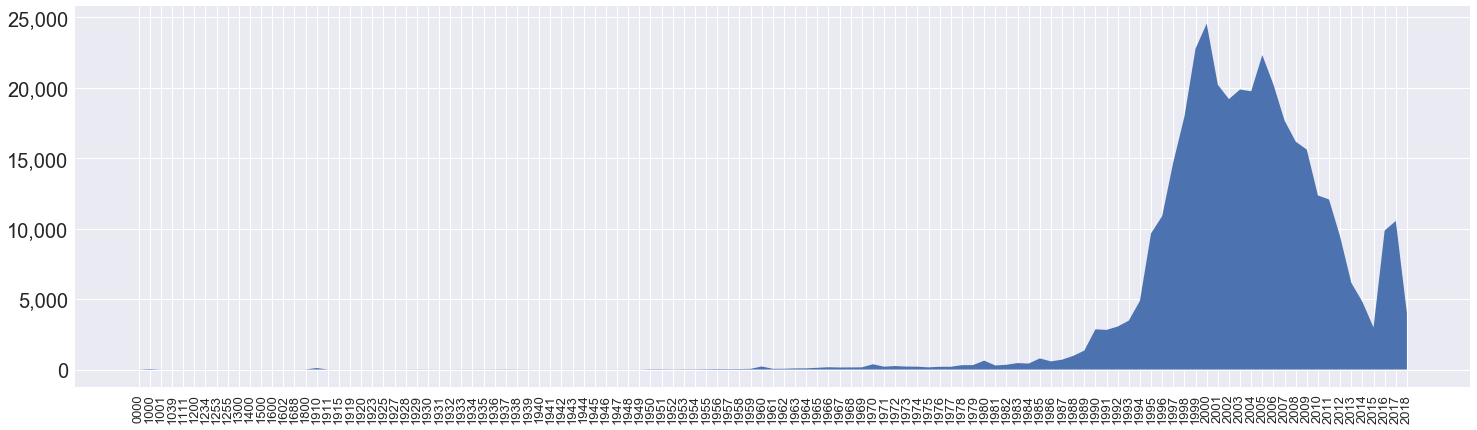

In [33]:
# 2019年以降のデータを対象外にする

df2 = df1[df1['yearofregistration'] <= '2018']

fig = plt.figure(figsize=(25, 7))
ax = fig.add_subplot(111)

ax.fill_between(df2['yearofregistration'], df2['count'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=20)

plt.show()

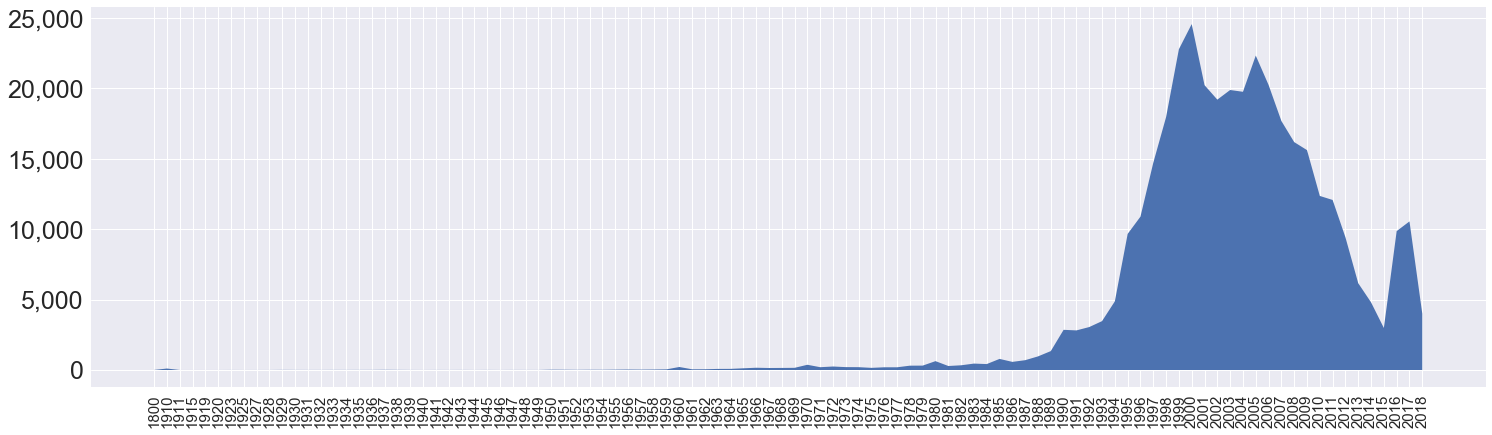

In [44]:
# 自動車が誕生した1769年以降のデータに限定

df3 = df2[df2['yearofregistration'] >= '1769']

fig = plt.figure(figsize=(25, 7))
ax = fig.add_subplot(111)

ax.fill_between(df3['yearofregistration'], df3['count'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=25)

plt.show()

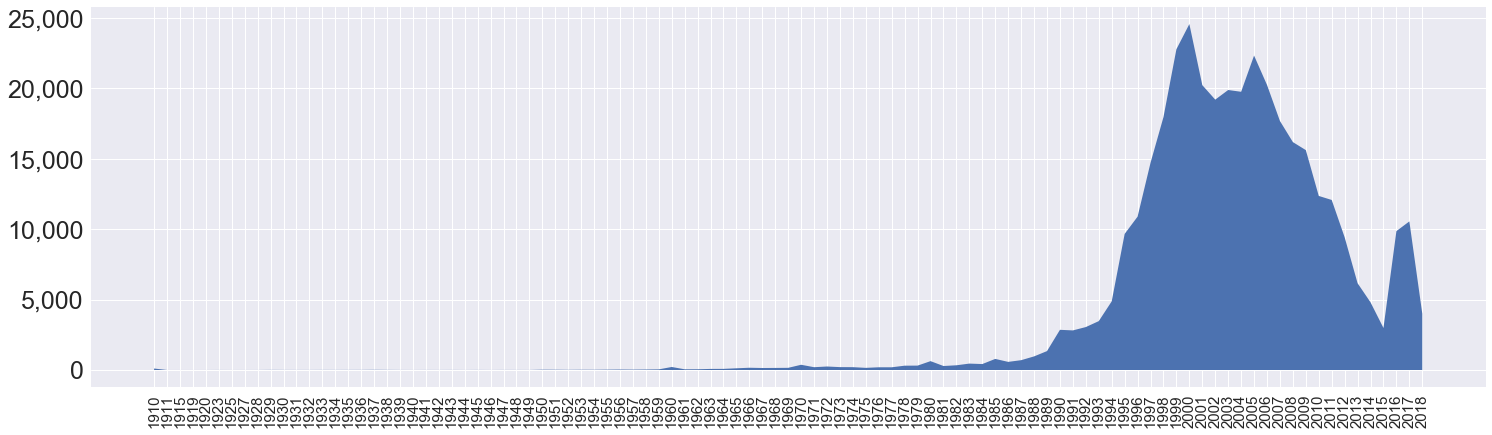

In [45]:
# 自動車の量産化、普及が始まった1900年以降に限定

df4 = df3[df3['yearofregistration'] >= '1900']

fig = plt.figure(figsize=(25, 7))
ax = fig.add_subplot(111)

ax.fill_between(df4['yearofregistration'], df4['count'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=25)

plt.show()

In [47]:
df4.describe()

,count
count,99.000000
mean,3750.787879
std,6786.598472
min,1.000000
25%,6.500000
50%,160.000000
75%,3258.500000
max,24552.000000


,yearofregistration,count
56,1960,214


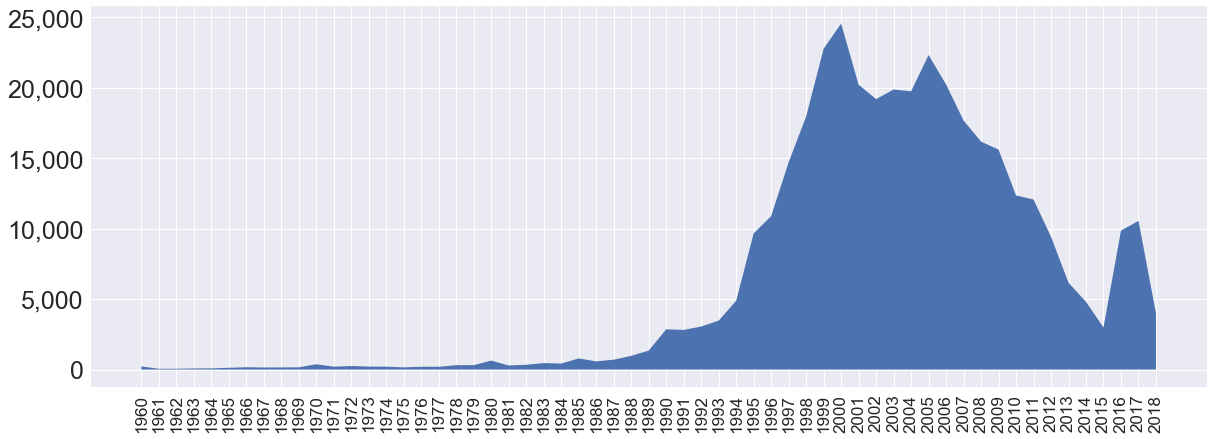

In [51]:
display(df4[df4['count'] >= 160].head(1))

# 出品件数がデータの50％値を超えた1960年以降に限定

df5 = df4[df4['yearofregistration'] >= '1960']

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)

ax.fill_between(df5['yearofregistration'], df5['count'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x', labelsize=17, rotation=90)
ax.tick_params(axis='y', labelsize=25)

plt.show()

In [ ]:
# '_r'が含まれているnameを抽出（おまけ）

In [34]:
data = pd.read_sql('select name, seller, price, vehicletype, yearofregistration, monthofregistration, gearbox, powerps, model, kilometer, fueltype, brand, notrepaireddamage from auto', connection)

In [41]:
test1 = np.array(data[data['name'].str.contains('_r')]['name'])

for i in test1:
    print(i)

Smart_For_two_Klima_regensensor_uSw
Honda_HRV_reserviert!!!
muss_dringend_weg_!!!_2_mal_Alfa_romeo_156_Zu_Verkaufen
BMW_Z4_roadster_2.2i_M_Paket__Klima__Xenon
VW_Polo_Coupe_86c_in_rot__guter_Zustand__alltagsauto
Mercedes_E_Klasse_kotfuegel_richt
Schicker__roter__Sportflitzer_GOLF_4_1_6
BMW_Z4_roadster_2.2i
Tauache_90ccm_roller_gegen_auto
BMW_Z4_roadster_2.2i_Automatik_Prof_Navi
Audi_TT_1_8T_Klima_Leder_Bose_kompl._repariert_bitte_lesen_!!!
Seat__leon_cupra_r_auch_tausch
195/55_r15_sommerreifen_alu
Opel_Vectra_kombi_1.9_CDTI_IRMSCHER_vers._________POLSKIE_rej..
Smart__roadster_softtouch_Turbo
Renault_Kangoo__rot__BJ__2002__TﾜV_8/2016__Gifhorn
Renault_Twingo_97_in_rot_fuer_Bastler
Golf3_1_8l_150000_km_Rentner__rot__TﾜV_2017
fahrbereiter_Polo__rot_
Mini_One___HU/AU_neu!___schwarz_rot___Scheckheft__Alufelgen
VW_Passat_mit_rest_Tuev_April_2016
Volkswagen_Sharan__derzeit_reserviert_
Renault_clio_rot_Jahr_2007
Suche_rote_nummern
BMW_Z3_roadster_1.8
Mercedes_Benz_SLK_230_Kompressor_AMG_Packet_